# 2. Regressão linear

Aula 08/04/2024

Dataset com altura de pessoas e idade. 

(101,2)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('../data/age_data_1.txt')

Transposição das linhas por colunas

Text(0, 0.5, 'Idade')

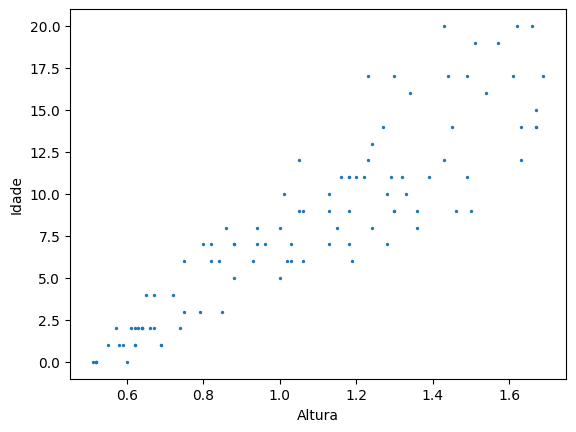

In [18]:
x,y = data.T

plt.scatter(x, y, s=2)
plt.xlabel('Altura')
plt.ylabel('Idade')

Classe para definir um modelo linear:

$y_m = ax +b$

In [19]:
class Model:
    """Modelo linear com parâmetros `a` e `b`."""

    def __init__(self, a, b):

        self.a = a
        self.b = b
        
        
    def __call__(self, x):
        y = self.a*x + self.b
        return  y
    
    def copy(self):
        return Model(self.a, self.b)


Plot de uma reta coeficientes aleatórios

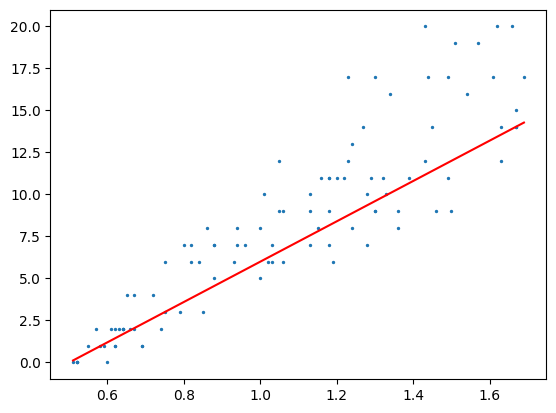

In [21]:
model = Model(a=12, b=-6)
xm = np.linspace(x.min(), x.max())
ym = model(xm)

plt.scatter(x, y, s=2)
plt.plot(xm, ym, 'r')

Ajuste dos modelos:

Minimização da métrica do erro quadrático médio (MSE)

$$
        \frac{1}{n}\sum_{i=1}^{n}(y(i)-y(m))^2
$$

In [22]:
def mse(model, x, y):
    ym = model(x)
    error = np.mean((y-ym)**2)
    
    return error

mse(model,x,y)

8.027488

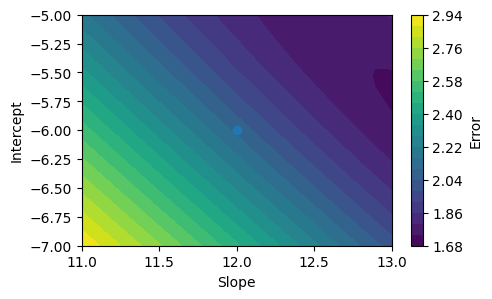

In [24]:
def get_local_error(model, x, y, par_range):
    '''Calcula o erro quadrático médio entre `x` e `y` para combinações de 
    parâmetros do modelo no intervalo [a-par_range, a+par_range] e [b-par_range, b+par_range].'''
    
    # Número de pontos
    size = 20
    # Parâmetros do modelo
    a, b = model.a, model.b
    # Possíveis parâmetros do modelo
    a_vals = np.linspace(a-par_range, a+par_range, size)
    b_vals = np.linspace(b-par_range, b+par_range, size)

    # Avalia o modelo para cada combinação de parâmetros
    error_grid = np.zeros((size, size))
    for i, b_val in enumerate(b_vals):
        for j, a_val in enumerate(a_vals):
            model_close = Model(a_val, b_val)
            error = mse(model_close, x, y)
            error_grid[i,j] = error
            
    return error_grid, a_vals, b_vals

def plot_local_error(model, x, y, par_range=1.):
    '''Plota o erro quadrático médio para diversos parâmetros do modelo.'''
    
    error_grid, a_vals, b_vals = get_local_error(model, x, y, par_range)
    
    plt.figure(figsize=(5,3))
    # A função np.log ajuda a diferenciar valores muito parecidos
    plt.contourf(a_vals, b_vals, np.log(error_grid), levels=20)

    cbar = plt.colorbar()
    cbar.set_label('Error')
    plt.scatter(model.a, model.b)
    plt.xlabel('Slope')
    plt.ylabel('Intercept')


plot_local_error(model, x, y)

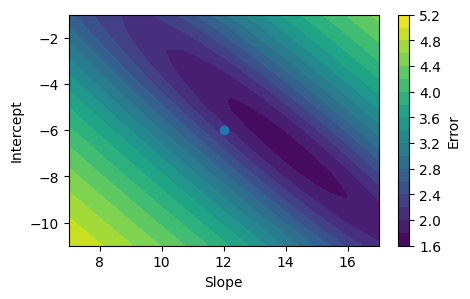

In [25]:
plot_local_error(model, x, y, par_range=5)

$$
        e = \frac{1}{n}\sum_{i=1}^{n}(y(i)-y(m))^2
$$


$$
        e = \frac{1}{n}\sum_{i=1}^{n}(y(i)-ax(i)-b)^2
$$

$$
        \frac{e}{a} = - \frac{2}{n}\sum_{i=1}^{n}(y(i)-ax(i)-b)x(i)
$$


$$
        \frac{e}{a} = - \frac{2}{n}\sum_{i=1}^{n}(y(i)-ax(i)-b)
$$

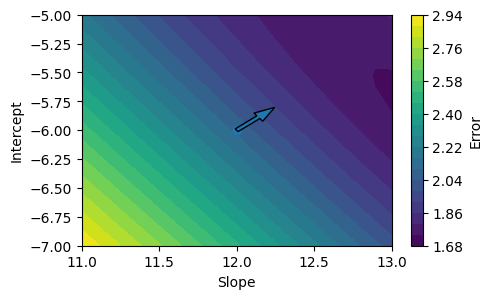

In [26]:
def mse_grad(model, x, y):
    
    n = len(x)
    ym = model(x)
    grad_a = -2*np.sum((y-ym)*x)/n
    
    grad_b = -2*np.sum(y-ym)/n
    
    return grad_a, grad_b

grad = mse_grad(model, x, y)
    
plot_local_error(model, x, y)
lr = 0.04
plt.arrow(model.a, model.b, -lr*grad[0], -lr*grad[1], width = 0.03)


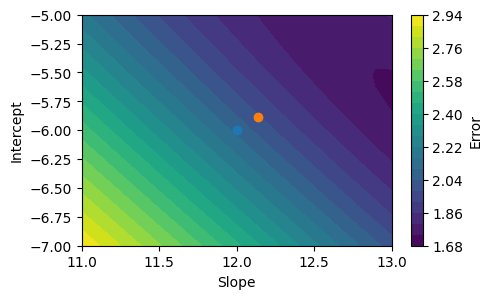

In [27]:
def step(model, x, y, lr):
    '''Dá um passo de gradiente descendente. Os parâmetros do modelo
    são modificados in-place.'''

    grad = mse_grad(model, x, y)
    # Modifica os parâmetros na direção contrária do gradiente
    model.a = model.a - lr*grad[0]
    model.b = model.b - lr*grad[1]

# Copia modelo original para plotar
model_or = model.copy()

step(model, x, y, lr=0.04)
plot_local_error(model_or, x, y)
plt.scatter(model.a, model.b)

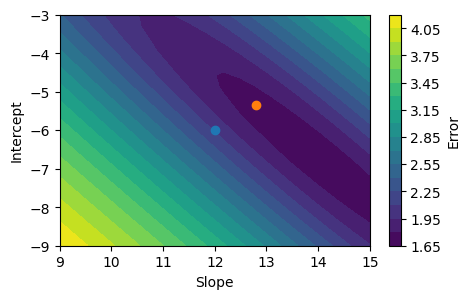

In [28]:
model = model_or.copy()

step(model, x, y, lr=0.23)
plot_local_error(model_or, x, y, par_range=3)
plt.scatter(model.a, model.b)

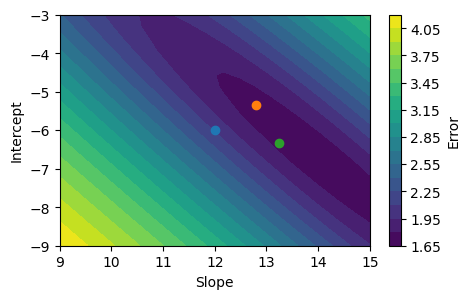

In [29]:
model_1_step = model.copy()
step(model, x, y, lr=5)

plot_local_error(model_or, x, y, par_range=3)
plt.scatter(model_1_step.a, model_1_step.b)
plt.scatter(model.a, model.b)

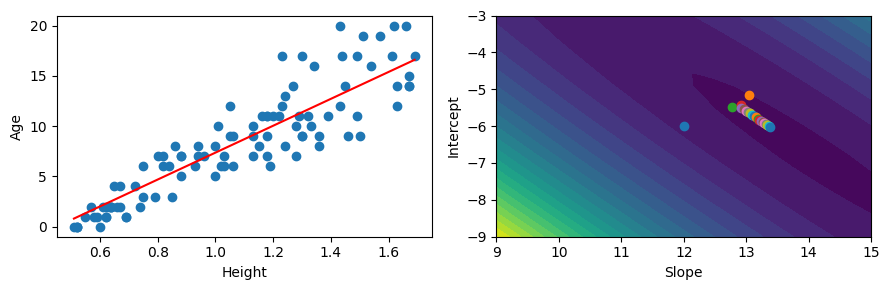

CPU times: total: 12 s
Wall time: 12.6 s


In [31]:
%%time
from IPython import display

def plot_figure(model, x, y, fig=None):

    # Aplica o modelo para valores entre x.min() e x.max()
    xm = np.linspace(x.min(), x.max())
    ym = model(xm)

    if fig is None:
        error_grid, a_vals, b_vals = get_local_error(model, x, y, par_range=3)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))
        # Plot 1
        ax1.scatter(x, y)
        ax1.plot(xm, ym, color='r')
        ax1.set_xlabel('Height')
        ax1.set_ylabel('Age')
        # Plot 2
        ax2.contourf(a_vals, b_vals, error_grid, levels=20)
        ax2.scatter(model.a, model.b)
        ax2.set_xlabel('Slope')
        ax2.set_ylabel('Intercept')
        plt.tight_layout()
        plt.close()
    else:
        # Atualiza somente a linha do plot 1 e os pontos do plot 2
        ax1, ax2 = fig.axes
        ax1.lines[0].set_data(xm, ym)
        ax2.scatter(model.a, model.b)

    # Remove o plot anterior
    display.clear_output(wait=True) 
    display.display(fig)
    
    return fig

def train(model, x, y, lr, num_epochs):

    fig = plot_figure(model, x, y)

    for epoch in range(0, num_epochs):
        step(model, x, y, lr)
        plot_figure(model, x, y, fig)

model = Model(a=12, b=-6)
num_epochs = 20
lr = 0.3
train(model, x, y, lr, num_epochs)

## Regressão linear usando diferenciação automática no Pytorch - 15/04/2024


As folhas são: x,y e a,b

Porém, o interessante será calcular para os parâmetros a,b (por isso o requires_grad = True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
class Model:
    
    def __init__(self,a,b):
        
        self.a = torch.tensor(a,requires_grad=True)
        
        self.b = torch.tensor(b,requires_grad=True)
    
    
    def __call__(self, x):
        y = self.a*x + self.b
        return y
    
    
def mse(model, x, y):
    ym = model(x)
    error = torch.mean((y-ym)**2)
    
    return error
    
def step(model, x, y, lr):
    
    error = mse(model, x, y)
    # Remove os gradientes se já tiverem sido calculados
    model.a.grad = None
    model.b.grad = None
    
    # popula os parametros a e b do modelo com os atributos grad
    # calcula o gradiente
    # Vai na direção 'contrária' ao gradiente, minimizando o erro (gradiente descendente) 
    error.backward()
    
    # Desativa o cálculo de gradiente
    with torch.no_grad():
        
        model.a -= lr*model.a.grad
        model.b -= lr*model.b.grad
        
    # .item() remove a variável do grafo de computação e converte para float
    return error.item()

def train(model, x,y, lr, num_epochs):
    errors = []
    for epochs in range(num_epochs):
        error = step(model, x, y, lr)
        errors.append(error)
        
    return errors


In [4]:
data = torch.from_numpy(np.loadtxt('../data/age_data_1.txt'))
x, y = data.T

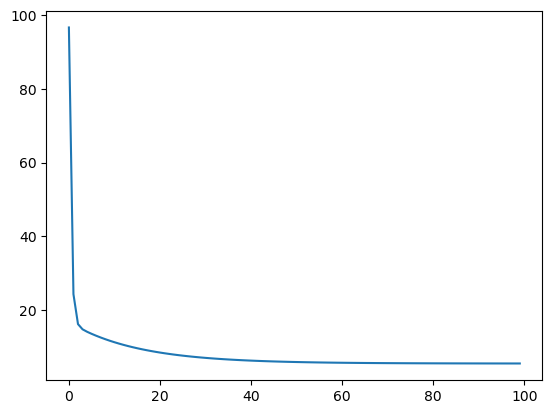

In [9]:
model = Model(a=0.,b=0.)
errors = train(model, x, y, lr=0.3,num_epochs=100)

plt.plot(errors)